 *****Text Extraction*****
 
 Paddle OCR 

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
import random
import math
import re
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.visualize import display_instances
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn import model as modellib, utils

Using TensorFlow backend.


In [5]:
!pip install paddleocr paddlepaddle

In [ ]:
from paddleocr import PaddleOCR
import cv2

# Load PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\PMC5707931___ijerph-14-01292-g003.jpg"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [9]:
# trying with ML insights' testing dataset

[2025/03/17 11:23:06] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

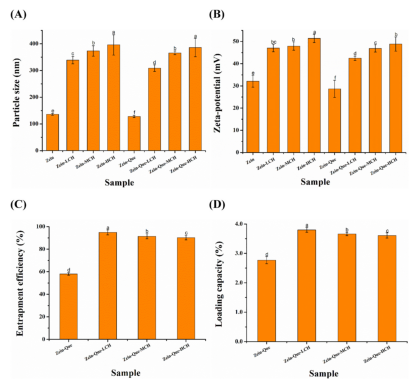

In [11]:
# Load PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\fig1.png"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2025/03/17 13:14:31] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

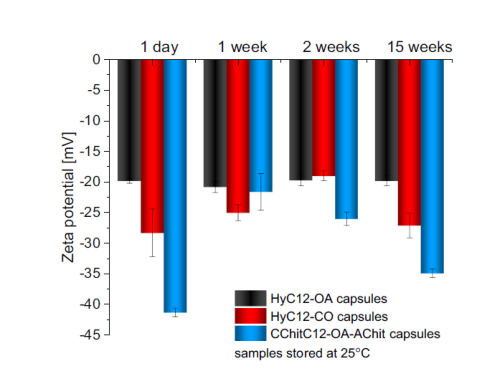

In [12]:
# Load PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\fig3.png"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2025/03/17 13:16:08] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

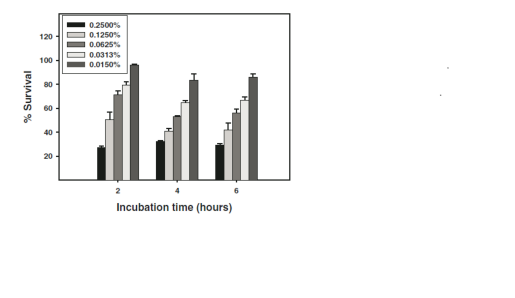

In [13]:
# Load PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\30617756_cellviability.png"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2025/03/17 13:20:15] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

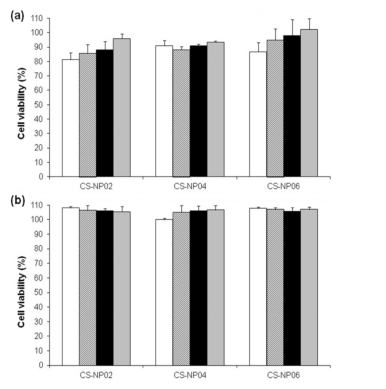

In [15]:

ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\26354244_fig.4.png"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2025/03/17 13:17:35] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

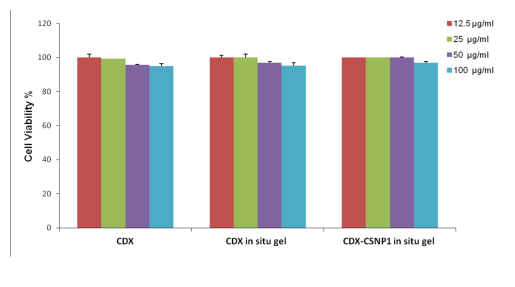

In [14]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\29655798_cellviability.png"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2025/03/17 13:28:13] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

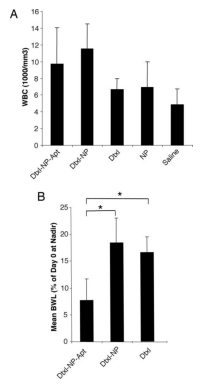

In [17]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\PMC1458875_Fig5.jpg"

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

try easy ocr with last image Fig5

In [18]:
import easyocr

def extract_text_easyocr(image_path):
    # Initialize EasyOCR reader (CPU mode)
    reader = easyocr.Reader(['en'], gpu=False)

    # Perform OCR (get text + bounding boxes)
    results = reader.readtext(image_path)

    # Store detected text with positions
    text_boxes = []
    for (bbox, text, confidence) in results:
        x_min, y_min = bbox[0]  # Get X, Y position of text
        text_boxes.append((x_min, y_min, text))

    # Sort text from left to right (X-axis)
    text_boxes.sort()

    # Merge words that belong to the same X-axis label
    merged_labels = {}
    for x, y, text in text_boxes:
        found = False
        for key in merged_labels.keys():
            if abs(key - x) < 50:  # If words are close in X, merge them
                merged_labels[key] += " " + text
                found = True
                break
        if not found:
            merged_labels[x] = text

    # Return fixed extracted text
    fixed_text = "\n".join([merged_labels[x] for x in sorted(merged_labels.keys())])
    return fixed_text

if __name__ == "__main__":
    image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\PMC1458875_Fig5.jpg"
    
    # Run improved EasyOCR with text merging
    extracted_text = extract_text_easyocr(image_path)
    
    print("Fixed Extracted Text (EasyOCR):\n", extracted_text)
    

Using CPU. Note: This module is much faster with a GPU.


Fixed Extracted Text (EasyOCR):
 A [ 8 Dtxl-NP-Apt
12 10 16 14 B
1 2 3 8 1 8 25 20 15 10 Dtxl-NP
1 -Apt
Dtxl 3
Dtxl 2
Saline


[2025/03/17 14:25:04] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\joice/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\joice/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

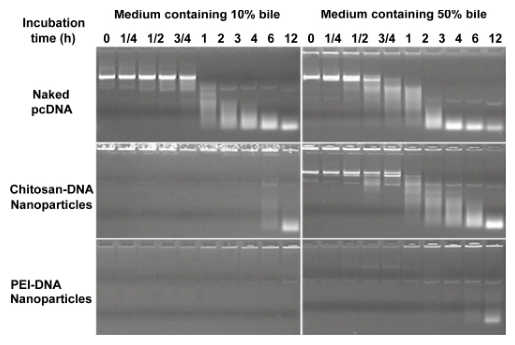

In [21]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Image path
image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\PMC1828073_Fig1.jpg"

# Perform OCRPMC1828073_Fig1.jpg
results = ocr.ocr(image_path, cls=True)

# Store detected text with positions
text_boxes = []

for line in results:
    for word_info in line:
        text, confidence = word_info[1][0], word_info[1][1]
        x_min = word_info[0][0][0]  # Get X coordinate of text
        y_min = word_info[0][0][1]  # Get Y coordinate of text
        text_boxes.append((x_min, y_min, text))

# Sort text by X position (left to right)
text_boxes.sort()

# Merge words that belong to the same X-axis label
merged_labels = {}
for x, y, text in text_boxes:
    found = False
    for key in merged_labels.keys():
        if abs(key - x) < 50:  # If the words are close in X, merge them
            merged_labels[key] += " " + text
            found = True
            break
    if not found:
        merged_labels[x] = text

# Print fixed labels
for x in sorted(merged_labels.keys()):
    print("Fixed X-axis Label:", merged_labels[x])
    
# Show the image with detected text
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [22]:
import easyocr

def extract_text_easyocr(image_path):
    # Initialize EasyOCR reader (CPU mode)
    reader = easyocr.Reader(['en'], gpu=False)

    # Perform OCR (get text + bounding boxes)
    results = reader.readtext(image_path)

    # Store detected text with positions
    text_boxes = []
    for (bbox, text, confidence) in results:
        x_min, y_min = bbox[0]  # Get X, Y position of text
        text_boxes.append((x_min, y_min, text))

    # Sort text from left to right (X-axis)
    text_boxes.sort()

    # Merge words that belong to the same X-axis label
    merged_labels = {}
    for x, y, text in text_boxes:
        found = False
        for key in merged_labels.keys():
            if abs(key - x) < 50:  # If words are close in X, merge them
                merged_labels[key] += " " + text
                found = True
                break
        if not found:
            merged_labels[x] = text

    # Return fixed extracted text
    fixed_text = "\n".join([merged_labels[x] for x in sorted(merged_labels.keys())])
    return fixed_text

if __name__ == "__main__":
    image_path = "C:\\Users\\joice\\Downloads\\Mask_RCNN\\test_images\\PMC1828073_Fig1.jpg"
    
    # Run improved EasyOCR with text merging
    extracted_text = extract_text_easyocr(image_path)
    
    print("Fixed Extracted Text (EasyOCR):\n", extracted_text)
    

Using CPU. Note: This module is much faster with a GPU.


Fixed Extracted Text (EasyOCR):
 Chitosan-DNA Nanoparticles Nanoparticles PEI-DNA Incubation time (h) Naked pcDNA
Medium containing 10% bile 1/4 1/2
3/4
Medium containing 50% bile 1/4 1/2
3/4
